In [23]:
graphics_toolkit('qt')

In [24]:
addpath('../libs/');

# 1. Multi-class Classification

In [25]:
input_layer_size = 400;
num_labels = 10;


## 1.1 Loading data

**ex3data1.mat** contains 2 variables
- matrix X, contains 5000 examples, each rows is a unrolled 20x20 grayscale image of the digit.
- vector y, contains 5000 labels, but since octave starts from index 1, to make things more compatible with octave, the '0' digit is labeled as 10, while the digits '1' to '9' are labeled as '1' to '9' in their natural order.

In [26]:
load('../../data/ex3data1.mat');
m = size(X, 1);

## 1.2 Visualizing data

In [27]:
% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

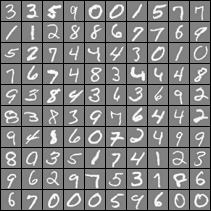

In [28]:
displayData(sel);

## 1.4 One-vs-all prediction

In [29]:
lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);

In [30]:
pred = predictOneVsAll(all_theta, X);
fprintf('Training Set Accuracy: %f\n', mean(double(pred==y)*100));

Training Set Accuracy: 95.040000


Displaying Example Image
One-vs-All Prediction: 5 (digit 5)


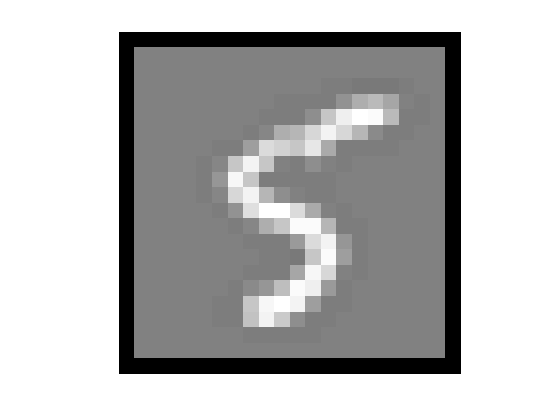

In [31]:
rp = randperm(m);
for i = 1:1
    fprintf('Displaying Example Image\n');
    displayData(X(rp(i), :));

    pred = predictOneVsAll(all_theta, X(rp(i), :));
    fprintf('One-vs-All Prediction: %d (digit %d)\n', pred, mod(pred, 10));
end

# 2. Neural Networks
**ex3weights** contains trained parameters $\Theta_1, \Theta_2$

```octave
size(Theta1) == [25 401]
size(Theta2) == [10 26]
```

$L=2$

$s_0=400, s_1=25, s_2 = s_L=10$

we apply forward propagation algorithm with these 2 $\Theta_1, \Theta_2$ for prediction

In [32]:
input_layer_size = 400;
hidder_layer_size = 25;
num_labels = 10;

In [33]:
load('../../data/ex3weights.mat');
whos;

Variables visible from the current scope:

variables in scope: top scope

  Attr   Name                   Size                     Bytes  Class
  ====   ====                   ====                     =====  ===== 
         Theta1                25x401                    80200  double
         Theta2                10x26                      2080  double
         X                   5000x400                 16000000  double
         all_theta             10x401                    32080  double
         ans                    1x1                          8  double
         hidder_layer_size      1x1                          8  double
         i                      1x1                          8  double
         input_layer_size       1x1                          8  double
         lambda                 1x1                          8  double
         m                      1x1                          8  double
         num_labels             1x1                          8  double
    

In [34]:
pred = predict(Theta1, Theta2, X);
pred2 = vectorizedPredict(X, {Theta1', Theta2'}, @sigmoid);
fprintf('Training Set Accuracy: %f\n', mean(double(pred==y)*100));
fprintf('Training Set Accuracy by vectorized calculation: %f\n', mean(double(p2==y)*100));

Training Set Accuracy: 97.520000
Training Set Accuracy by vectorized calculation: 97.520000


Displaying Example Image
Neural Networks Prediction: 7 (digit 7)


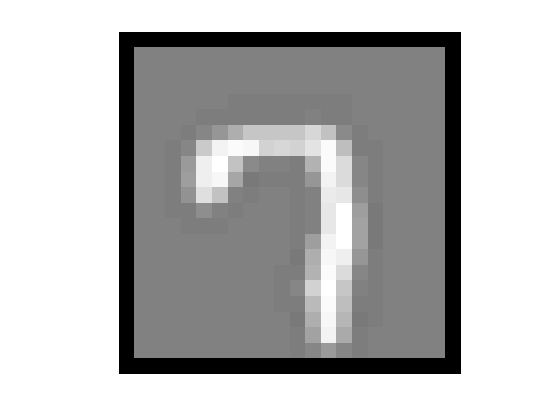

In [50]:
rp = randperm(m);
for i = 1:1
    fprintf('Displaying Example Image\n');
    displayData(X(rp(i), :));

    pred = vectorizedPredict(X(rp(i), :), {Theta1', Theta2'}, @sigmoid);
    fprintf('Neural Networks Prediction: %d (digit %d)\n', pred, mod(pred, 10));
end